<h1>   
    <font color = Navy>
        <span style='font-family:Arial Black'>
            DATA ANALYSIS: LIFE EXPECTANCY
        </span>   
    </font>
</h1>
<h2>
    <font color = Indigo>
        <span style='font-family:monospace'>
            by Itsuki Emoto (2024/12/6)
        </span>   
    </font>  
</h2>

<h3>   
    <font color = black>
        <span style='font-family:monospace'>
            <ins>Table of Contents</ins>
        </span>   
    </font>    
</h3>
<span style='font-family:monospace'>
    <font color = black>
        <ol>
            <li><a href='#AboutDataset'>About Dataset</a></li>
            <li><a href='#Preparation'>Preparation</a></li>
            <li><a href='#Interpretation'>Data Interpretation</a></li>
            <li><a href='#Goals'>Goals</a></li>
            <li><a href='#Cleaning'>Data Cleaning and Manipulation</a></li>
            <li><a href='#Modeling'>Modeling and Analysis</a></li>
            <li><a href='#Conclusion'>Conclusion</a></li>            
        </ol>
    </font>
</span>

<a id="AboutDataset"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            1. About Dataset
        </span>   
    </font>    
</h2>

Source: <b>World Health Organization, United Nations</b>
(<a href='https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?fbclid=IwAR155pP1NyfjMQUfIxPN-s6oD06RWTAX9X0Gv5wkvPdVlUgP__Us2VNxujE'> <b>Kaggle</b> </a>) <br><br>
About:<br>
The WHO's Global Health Observatory provides health data for 193 countries, including life expectancy and health factors. Data from 2000-2015 was analyzed, showing significant health improvements, particularly in developing nations. Economic data was sourced from the UN. After merging the datasets, missing values were identified, particularly in population, Hepatitis B, and GDP, with missing data from smaller countries. These countries were excluded, resulting in a final dataset of 22 columns and 2938 rows, containing 20 predicting variables categorized into immunization, mortality, economic, and social factors.<br>

Downloaded from the website on 3 December 2024

<a id="Preparation"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            2. Preparation
        </span>   
    </font>    
</h2>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            2.1 Importing the Libraries
        </span>   
    </font>    
</h3>

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import os
import sklearn

# Data vizualization
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Disabling warnings
import warnings
warnings.filterwarnings('ignore')

# Making Jupyter Notebook's output stable across runs
np.random.seed(42)

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            2.2 Adjusting Views
        </span>   
    </font>    
</h3>

In [2]:
# Applying some styles
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            2.3 Setting Save Data Directory
        </span>   
    </font>    
</h3>

In [3]:
# Save data directory
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "data_analysis"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

<a id="Interpretation"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            3. Data Interpretation
        </span>   
    </font>    
</h2>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.1 Data Import
        </span>   
    </font>    
</h3>

In [4]:
# Importing data
df = pd.read_csv("./dataset/life_expectancy.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.2 Inspecting Dataset
        </span>   
    </font>    
</h3>

In [5]:
# Database dimension
print("Database dimension - df:",df.shape)

# Database size
print("Database size      - df:",df.size)

Database dimension - df: (2938, 22)
Database size      - df: 64636


In [6]:
# Database column types
df.info(verbose=True, show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
# Renaming some columns as their names contain trailing spaces
df.rename(columns={" BMI ":"BMI","Life expectancy ":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "infant deaths":"Infant_Deaths","percentage expenditure":"Percentage_Exp","Hepatitis B":"HepatitisB",
                  "Measles ":"Measles"," BMI ":"BMI","under-five deaths ":"Under_Five_Deaths","Diphtheria ":"Diphtheria",
                  " HIV/AIDS":"HIV/AIDS"," thinness  1-19 years":"thinness_1to19_years"," thinness 5-9 years":"thinness_5to9_years","Income composition of resources":"Income_Comp_Of_Resources",
                   "Total expenditure":"Tot_Exp"},inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'Infant_Deaths', 'Alcohol', 'Percentage_Exp', 'HepatitisB', 'Measles',
       'BMI', 'Under_Five_Deaths', 'Polio', 'Tot_Exp', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness_1to19_years',
       'thinness_5to9_years', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

In [8]:
# Altering the name of columns to lowercase
df.columns = [alias.lower() for alias in df.columns]
df.columns

Index(['country', 'year', 'status', 'life_expectancy', 'adult_mortality',
       'infant_deaths', 'alcohol', 'percentage_exp', 'hepatitisb', 'measles',
       'bmi', 'under_five_deaths', 'polio', 'tot_exp', 'diphtheria',
       'hiv/aids', 'gdp', 'population', 'thinness_1to19_years',
       'thinness_5to9_years', 'income_comp_of_resources', 'schooling'],
      dtype='object')

In [9]:
# Converting the categorical columns to type category
df["status"] = df.status.astype("category")
df["country"] = df.country.astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country                   2938 non-null   category
 1   year                      2938 non-null   int64   
 2   status                    2938 non-null   category
 3   life_expectancy           2928 non-null   float64 
 4   adult_mortality           2928 non-null   float64 
 5   infant_deaths             2938 non-null   int64   
 6   alcohol                   2744 non-null   float64 
 7   percentage_exp            2938 non-null   float64 
 8   hepatitisb                2385 non-null   float64 
 9   measles                   2938 non-null   int64   
 10  bmi                       2904 non-null   float64 
 11  under_five_deaths         2938 non-null   int64   
 12  polio                     2919 non-null   float64 
 13  tot_exp                   2712 non-null   float6

In [10]:
# Showing distinct status
df.status.unique()

['Developing', 'Developed']
Categories (2, object): ['Developed', 'Developing']

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.3 Reviewing Data
        </span>   
    </font>    
</h3>

In [11]:
# Filtering the data frame to only Switzerland later than 2010
df_swiss = df[(df['country'] == 'Switzerland') & (df['year'] > 2010)]
df_swiss

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,...,polio,tot_exp,diphtheria,hiv/aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
2521,Switzerland,2015,Developed,83.4,49.0,0,NaN,0.00000,NaN,35,...,97.0,NaN,97.0,0.1,8989.84240,8282396.0,0.4,0.3,0.938,16.0
2522,Switzerland,2014,Developed,83.2,51.0,0,9.61,19479.91161,NaN,23,...,96.0,11.66,96.0,0.1,85814.58857,8188649.0,0.4,0.3,0.936,15.9
2523,Switzerland,2013,Developed,83.0,52.0,0,9.73,19099.04506,NaN,175,...,96.0,11.71,96.0,0.1,84658.88768,889346.0,0.4,0.3,0.934,15.8
2524,Switzerland,2012,Developed,82.7,54.0,0,9.86,18379.32974,NaN,61,...,96.0,11.59,96.0,0.1,83164.38795,7996861.0,0.5,0.3,0.932,15.7
2525,Switzerland,2011,Developed,82.6,55.0,0,9.99,18822.86732,NaN,621,...,96.0,11.21,96.0,0.1,87998.44468,7912398.0,0.5,0.3,0.932,15.6


In [12]:
# Countries included
pd.DataFrame(df.country.unique()).reset_index()

,index,0
0,0,Afghanistan
1,1,Albania
2,2,Algeria
3,3,Angola
4,4,Antigua and Barbuda
...,...,...
188,188,Venezuela (Bolivarian Republic of)
189,189,Viet Nam
190,190,Yemen
191,191,Zambia


<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            3.4 Data Dictionary
        </span>   
    </font>    
</h3>

<table>
  <tr>
    <th>Column Name</th>
    <th>Description(s)</th>
  </tr>
  <tr>
    <td>Status</td>
    <td>Developed or developing status</td>
  </tr>
  <tr>
    <td>Life Expectancy</td>
    <td>Life expectancy in age</td>
  </tr>
  <tr>
    <td>Adult Mortality</td>
    <td>Adult mortality rates of both sexes (probability of dying between 15 and 60 years per 1000 population)</td>
  </tr>
  <tr>
    <td>Infant Deaths</td>
    <td>Number of infant deaths per 1000 population</td>
  </tr>
  <tr>
    <td>Alcohol</td>
    <td>Alcohol consumption per capita (in liters of pure alcohol, age 15+)</td>
  </tr>
  <tr>
    <td>Percentage Expenditure</td>
    <td>Expenditure on health as a percentage of Gross Domestic Product per capita(%)</td>
  </tr>
  <tr>
    <td>Hepatitis B</td>
    <td>Hepatitis B (HepB) immunization coverage among 1-year-olds (%)</td>
  </tr>
  <tr>
    <td>Measles</td>
    <td>Measles - number of reported cases per 1000 population</td>
  </tr>
  <tr>
    <td>BMI</td>
    <td>Average body mass index (BMI) of entire population</td>
  </tr>
  <tr>
    <td>Under-Five Deaths</td>
    <td>Number of under-five deaths per 1000 population</td>
  </tr>
  <tr>
    <td>Polio</td>
    <td>Polio (Pol3) immunization coverage among 1-year-olds (%)</td>
  </tr>
  <tr>
    <td>Total expenditure</td>
    <td>General government expenditure on health as a percentage of total government expenditure (%)</td>
  </tr>
  <tr>
    <td>Diphteria</td>
    <td>Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)</td>
  </tr>
  <tr>
    <td>HIV/AIDS</td>
    <td>Deaths per 1 000 live births HIV/AIDS (0-4 years)</td>
  </tr>
  <tr>
    <td>GDP</td>
    <td>Gross Domestic Product per capita (in USD)</td>
  </tr>
  <tr>
    <td>Population</td>
    <td>Population of the country</td>
  </tr>
  <tr>
    <td>thinness 1-19 years</td>
    <td>Prevalence of thinness among children and adolescents for Age 10 to 19 (% )</td>
  </tr>
  <tr>
    <td>thinness 5-9 years</td>
    <td>Prevalence of thinness among children for Age 5 to 9(%)</td>
  </tr>
  <tr>
    <td>Income composition of resources</td>
    <td>Human Development Index in terms of income composition of resources (index ranging from 0 to 1)</td>
  </tr>
  <tr>
    <td>Schooling</td>
    <td>Number of years of Schooling(years)</td>
  </tr>

</table>

<a id="Goals"></a>
<h2>   
    <font color = blue>
       <span style='font-family:monospace'>
            4. Goals
        </span>   
    </font>    
</h2>

The goals of this analysis are: <br>
1. To demonstrate data cleaning and data manipulation process.<br>
2. To determine the relations of the parameters in the database with the life expectancies.<br>
3. To discuss briefly the trend of life expectancy in the world.

<a id="Cleaning"></a>
<h2>   
    <font color = blue>
       <span style='font-family:monospace'>
            5. Data Cleaning and Manipulation
        </span>   
    </font>    
</h2>

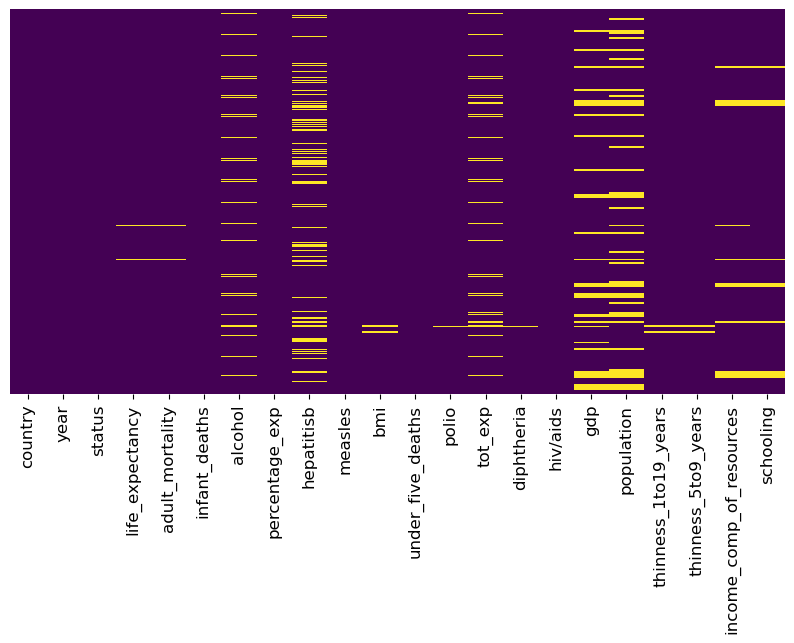

In [14]:
# Showing the distribution of missing values
plt.figure(figsize=(10,5))
msno = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap = 'viridis')
plt.show()

# Saving figure
# save_fig("msno_matrix")

<b>Note:</b> The yellow spaces indicates missing entries.

In [15]:
# Identifying percentage of null values in each column.
(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

population                  0.221920
hepatitisb                  0.188223
gdp                         0.152485
tot_exp                     0.076923
alcohol                     0.066031
income_comp_of_resources    0.056841
schooling                   0.055480
thinness_5to9_years         0.011572
thinness_1to19_years        0.011572
bmi                         0.011572
polio                       0.006467
diphtheria                  0.006467
life_expectancy             0.003404
adult_mortality             0.003404
hiv/aids                    0.000000
country                     0.000000
year                        0.000000
measles                     0.000000
percentage_exp              0.000000
infant_deaths               0.000000
status                      0.000000
under_five_deaths           0.000000
dtype: float64

<b>Note:</b> The label `life_expectancy` has missing values: Drop the records without label.

In [16]:
# Dropping records without label
df.dropna(subset=["life_expectancy"], inplace=True)
df["life_expectancy"].isnull().sum()

0

<b>Note:</b> Null values will be removed using `interpolate()` linear method - Filling `NaN` as the mean of the backward and fordward values. This method will be applied on each country.

In [17]:
# Filling NaN using linear interpolation method
num_cols = df.drop(["status", "country"], axis=1).columns.tolist()
for country in df.country.unique().tolist():
    df.loc[df["country"]==country, num_cols] = df.loc[df["country"]==country, num_cols].sort_values(by=["year"]).interpolate(axis=1)
df.isnull().sum()

country                     0
year                        0
status                      0
life_expectancy             0
adult_mortality             0
infant_deaths               0
alcohol                     0
percentage_exp              0
hepatitisb                  0
measles                     0
bmi                         0
under_five_deaths           0
polio                       0
tot_exp                     0
diphtheria                  0
hiv/aids                    0
gdp                         0
population                  0
thinness_1to19_years        0
thinness_5to9_years         0
income_comp_of_resources    0
schooling                   0
dtype: int64

In [18]:
# Casting some columns back to their types
df = df.astype({"year": "int64", "measles": "int64", "under_five_deaths": "int64"})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2928 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   country                   2928 non-null   category
 1   year                      2928 non-null   int64   
 2   status                    2928 non-null   category
 3   life_expectancy           2928 non-null   float64 
 4   adult_mortality           2928 non-null   float64 
 5   infant_deaths             2928 non-null   int64   
 6   alcohol                   2928 non-null   float64 
 7   percentage_exp            2928 non-null   float64 
 8   hepatitisb                2928 non-null   float64 
 9   measles                   2928 non-null   int64   
 10  bmi                       2928 non-null   float64 
 11  under_five_deaths         2928 non-null   int64   
 12  polio                     2928 non-null   float64 
 13  tot_exp                   2928 non-null   float64 
 1

In [19]:
# Rechecking percentage of null values in each column.
(df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)

country                     0.0
year                        0.0
income_comp_of_resources    0.0
thinness_5to9_years         0.0
thinness_1to19_years        0.0
population                  0.0
gdp                         0.0
hiv/aids                    0.0
diphtheria                  0.0
tot_exp                     0.0
polio                       0.0
under_five_deaths           0.0
bmi                         0.0
measles                     0.0
hepatitisb                  0.0
percentage_exp              0.0
alcohol                     0.0
infant_deaths               0.0
adult_mortality             0.0
life_expectancy             0.0
status                      0.0
schooling                   0.0
dtype: float64

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            5.1 Outlier Analysis
        </span>   
    </font>    
</h3>

In [20]:
# Creating the dataset including only numeric variables
num_df = df.drop(["country", "status", "year"], axis=1)
num_df.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,bmi,under_five_deaths,polio,tot_exp,diphtheria,hiv/aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


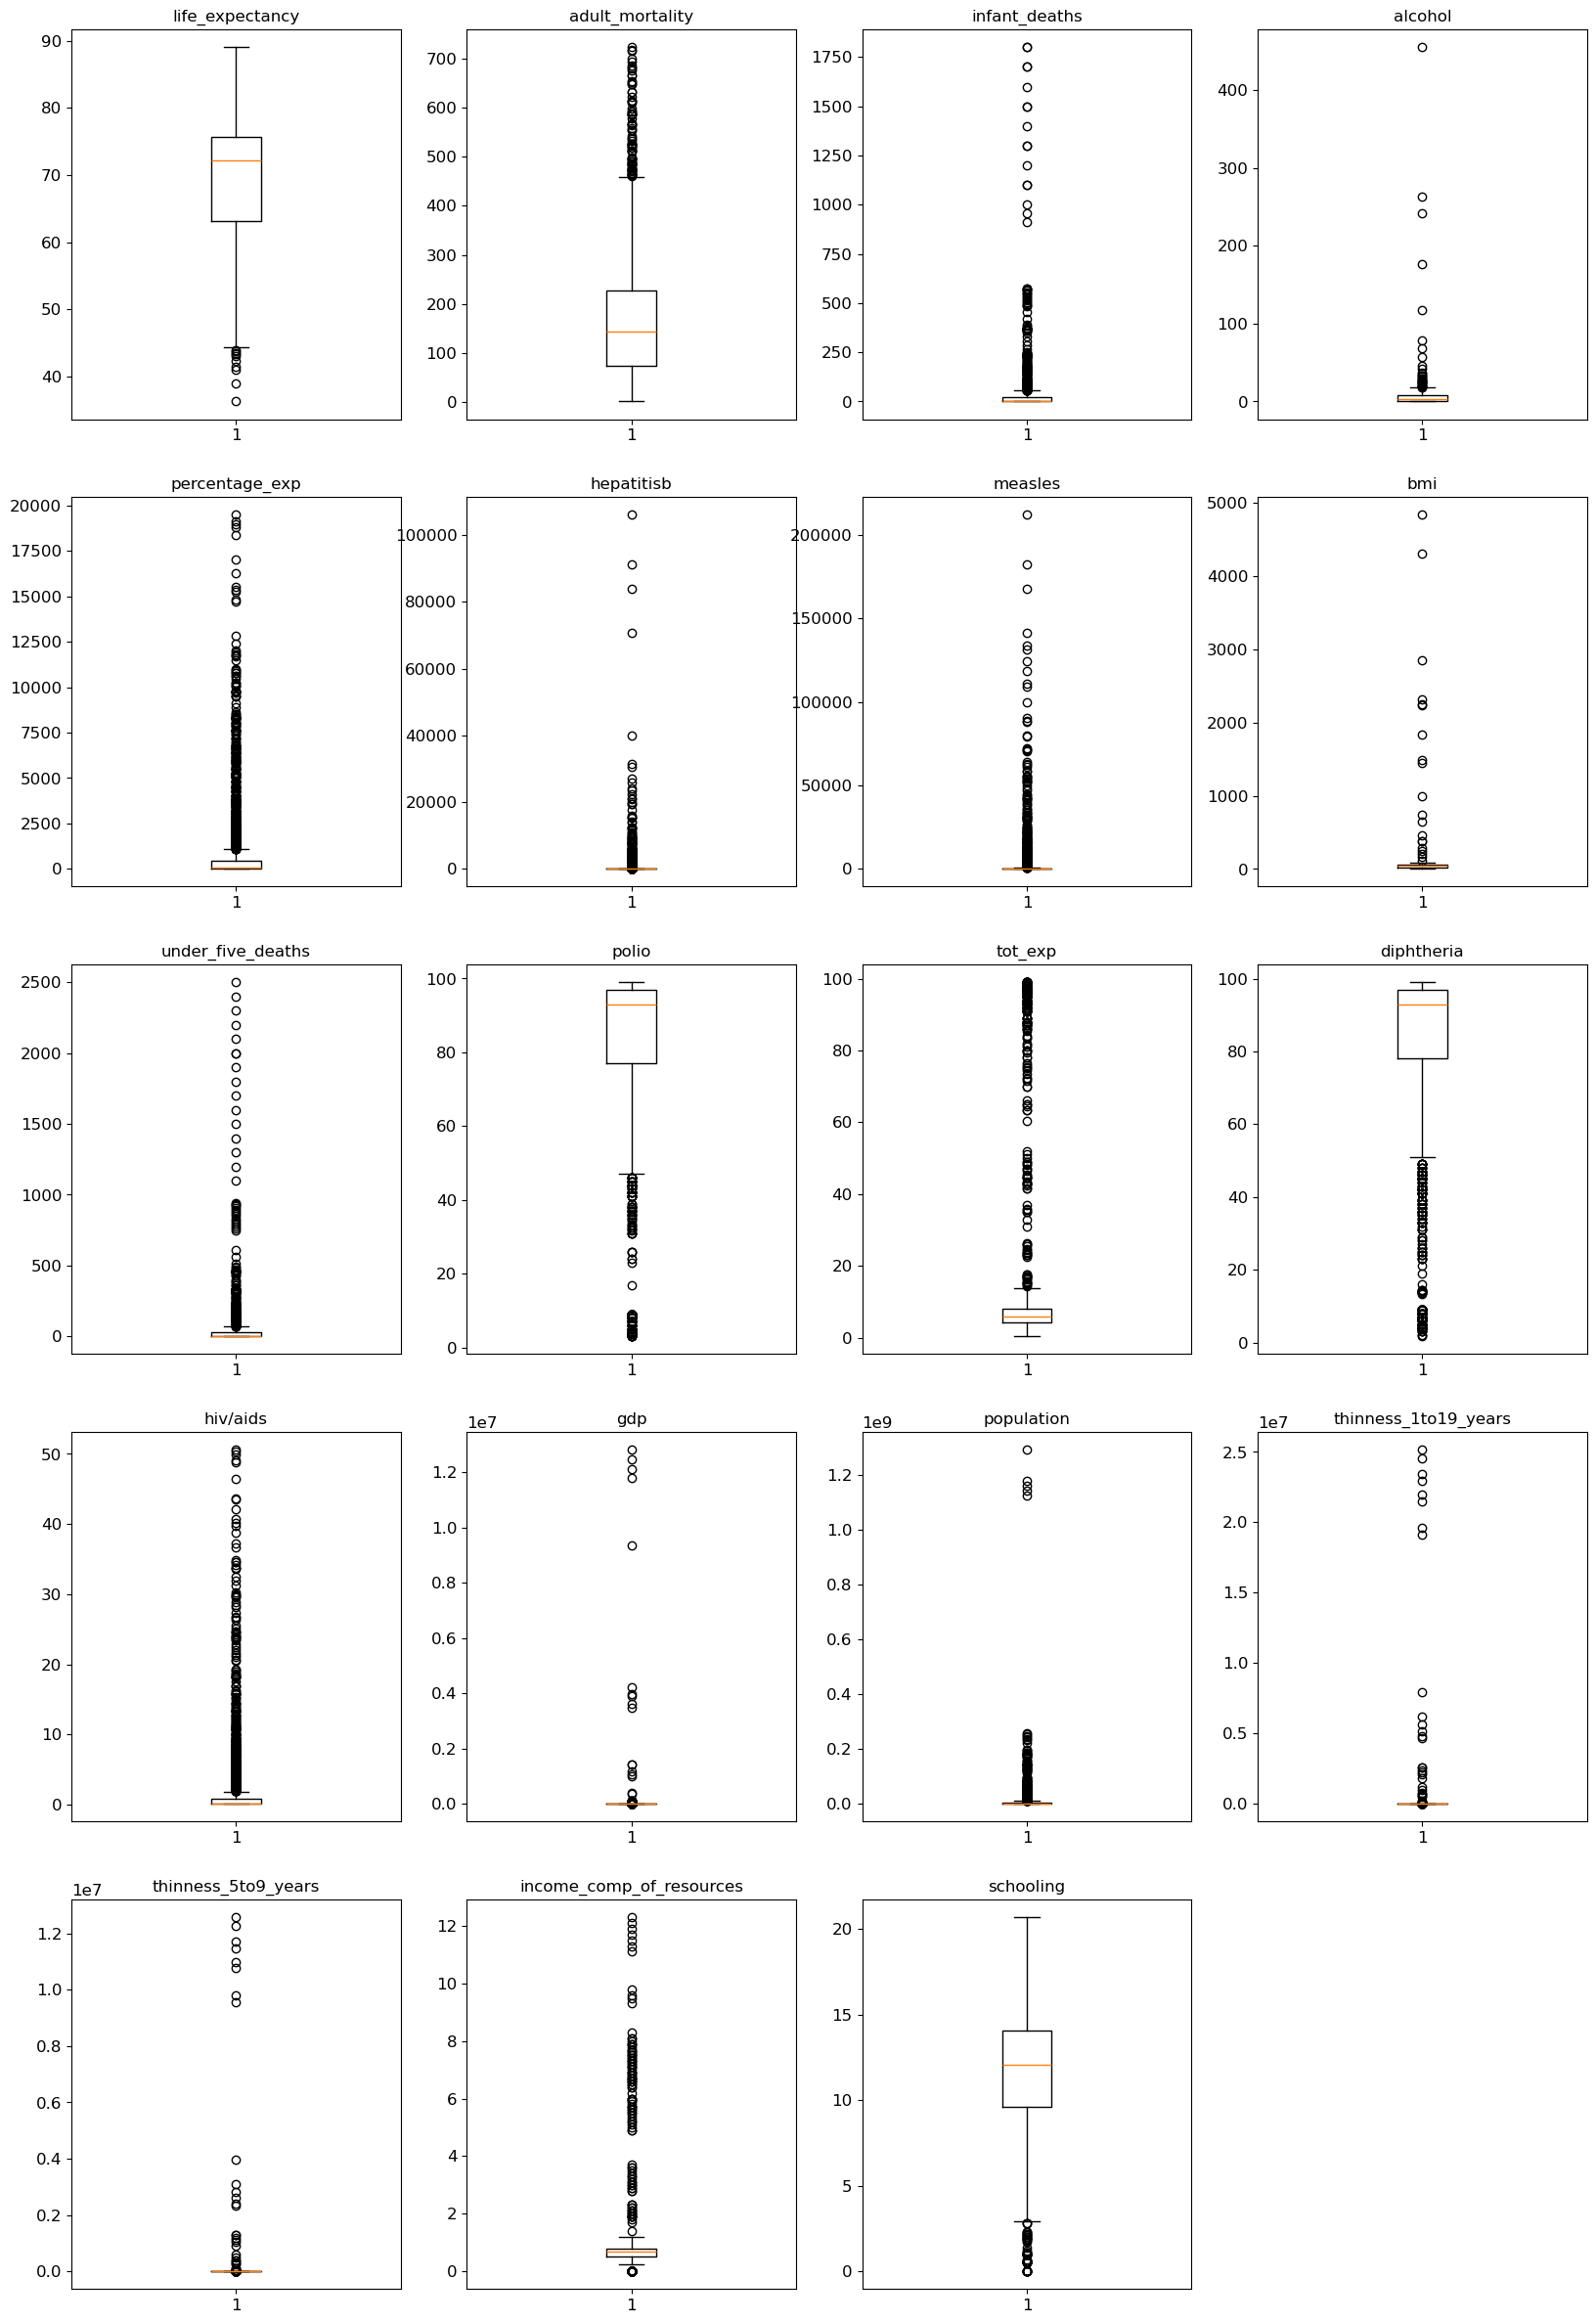

Saving figure box_plot_features


In [21]:
# Visualizing the outliers using box plot
plt.figure(figsize=(20,30))
i = 1
for column in num_df.columns:
    plt.subplot(5, 4, i)
    plt.boxplot(df[column], whis=1.5)
    plt.title(column)
    i += 1

plt.show()

# Saving figure
save_fig("box_plot_features")

In [22]:
# Calculating number of univariate outliners and its percentage based on IQR mathematical formula
outlier_df = pd.DataFrame(columns=["number", "percentage", "upper_quantile", "lower_quantile"], 
                          index=num_df.columns)

for column in num_df.columns:
    q75, q25 = np.percentile(df[column], [75, 25])
    IQR = q75 - q25
    upper = q75 + (IQR * 1.5)
    lower = q25 - (IQR * 1.5)
    outlier_df.loc[column, "upper_quantile"] = upper
    outlier_df.loc[column, "lower_quantile"] = lower
    outlier_df.loc[column, "number"] = len(np.where((df[column] > upper) | (df[column] < lower))[0])
    outlier_df.loc[column, "percentage"] = len(np.where((df[column] > upper) | (df[column] < lower))[0]) * 100 / len(df)
    
outlier_df.sort_values(by=["number", "percentage"], ascending=False)

,number,percentage,upper_quantile,lower_quantile
hepatitisb,706,24.112022,131.0,43.0
measles,542,18.510929,905.625,-543.375
hiv/aids,542,18.510929,1.85,-0.95
population,438,14.959016,11461365.625,-6854871.375
gdp,424,14.480874,12480.144348,-7141.756107
under_five_deaths,394,13.456284,70.0,-42.0
percentage_exp,388,13.251366,1099.254858,-651.786572
diphtheria,316,10.79235,125.5,49.5
infant_deaths,315,10.758197,55.0,-33.0
polio,270,9.221311,127.0,47.0


<b>Note:</b> The outlier number on the life expectancy column is low, hence it is considered consistent. 
However, the data for the disease-related fields have considerably high numbers of outliers. I will further explore the dataset to identify redundant data and address such cases accordingly.

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            5.2 Correlations
        </span>   
    </font>    
</h3>

In [23]:
# Showing the descriptive statistics for numerical columns
df.describe()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_exp,hepatitisb,measles,bmi,under_five_deaths,polio,tot_exp,diphtheria,hiv/aids,gdp,population,thinness_1to19_years,thinness_5to9_years,income_comp_of_resources,schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2.928000e+03,2.928000e+03,2.928000e+03,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,5.227361,740.321185,609.620347,2427.855874,47.554201,42.179303,82.153460,11.449710,81.849617,1.747712,3.529045e+04,9.957659e+06,7.941224e+04,3.970855e+04,0.822266,11.573053
std,4.61056,9.523867,124.292079,118.114450,12.292733,1990.930605,3930.909022,11485.970937,159.629655,160.700547,23.877735,20.639728,24.343860,5.085542,5.136172e+05,5.416492e+07,1.202291e+06,6.011452e+05,1.125777,3.782065
min,2000.00000,36.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.370000,1.680000,0.100000,1.333333e-01,1.666667e-01,1.000000e-01,1.000000e-01,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.800000,4.853964,76.000000,0.000000,19.400000,0.000000,77.000000,4.360000,78.000000,0.100000,2.164566e+02,1.371750e+04,1.600000e+00,1.600000e+00,0.500000,9.600000
50%,2007.50000,72.100000,144.000000,3.000000,3.675000,65.611455,93.000000,17.000000,43.500000,4.000000,93.000000,5.940000,93.000000,0.100000,1.220952e+03,5.459175e+05,3.400000e+00,3.400000e+00,0.684500,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.840000,442.614322,98.000000,362.250000,56.300000,28.000000,97.000000,8.180000,97.000000,0.800000,5.121932e+03,4.592777e+06,7.300000e+00,7.300000e+00,0.792000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,455.000000,19479.911610,106102.740888,212183.000000,4832.000000,2500.000000,99.000000,99.000000,99.000000,50.600000,1.281381e+07,1.293859e+09,2.515861e+07,1.257930e+07,12.300000,20.700000


<Figure size 640x480 with 0 Axes>

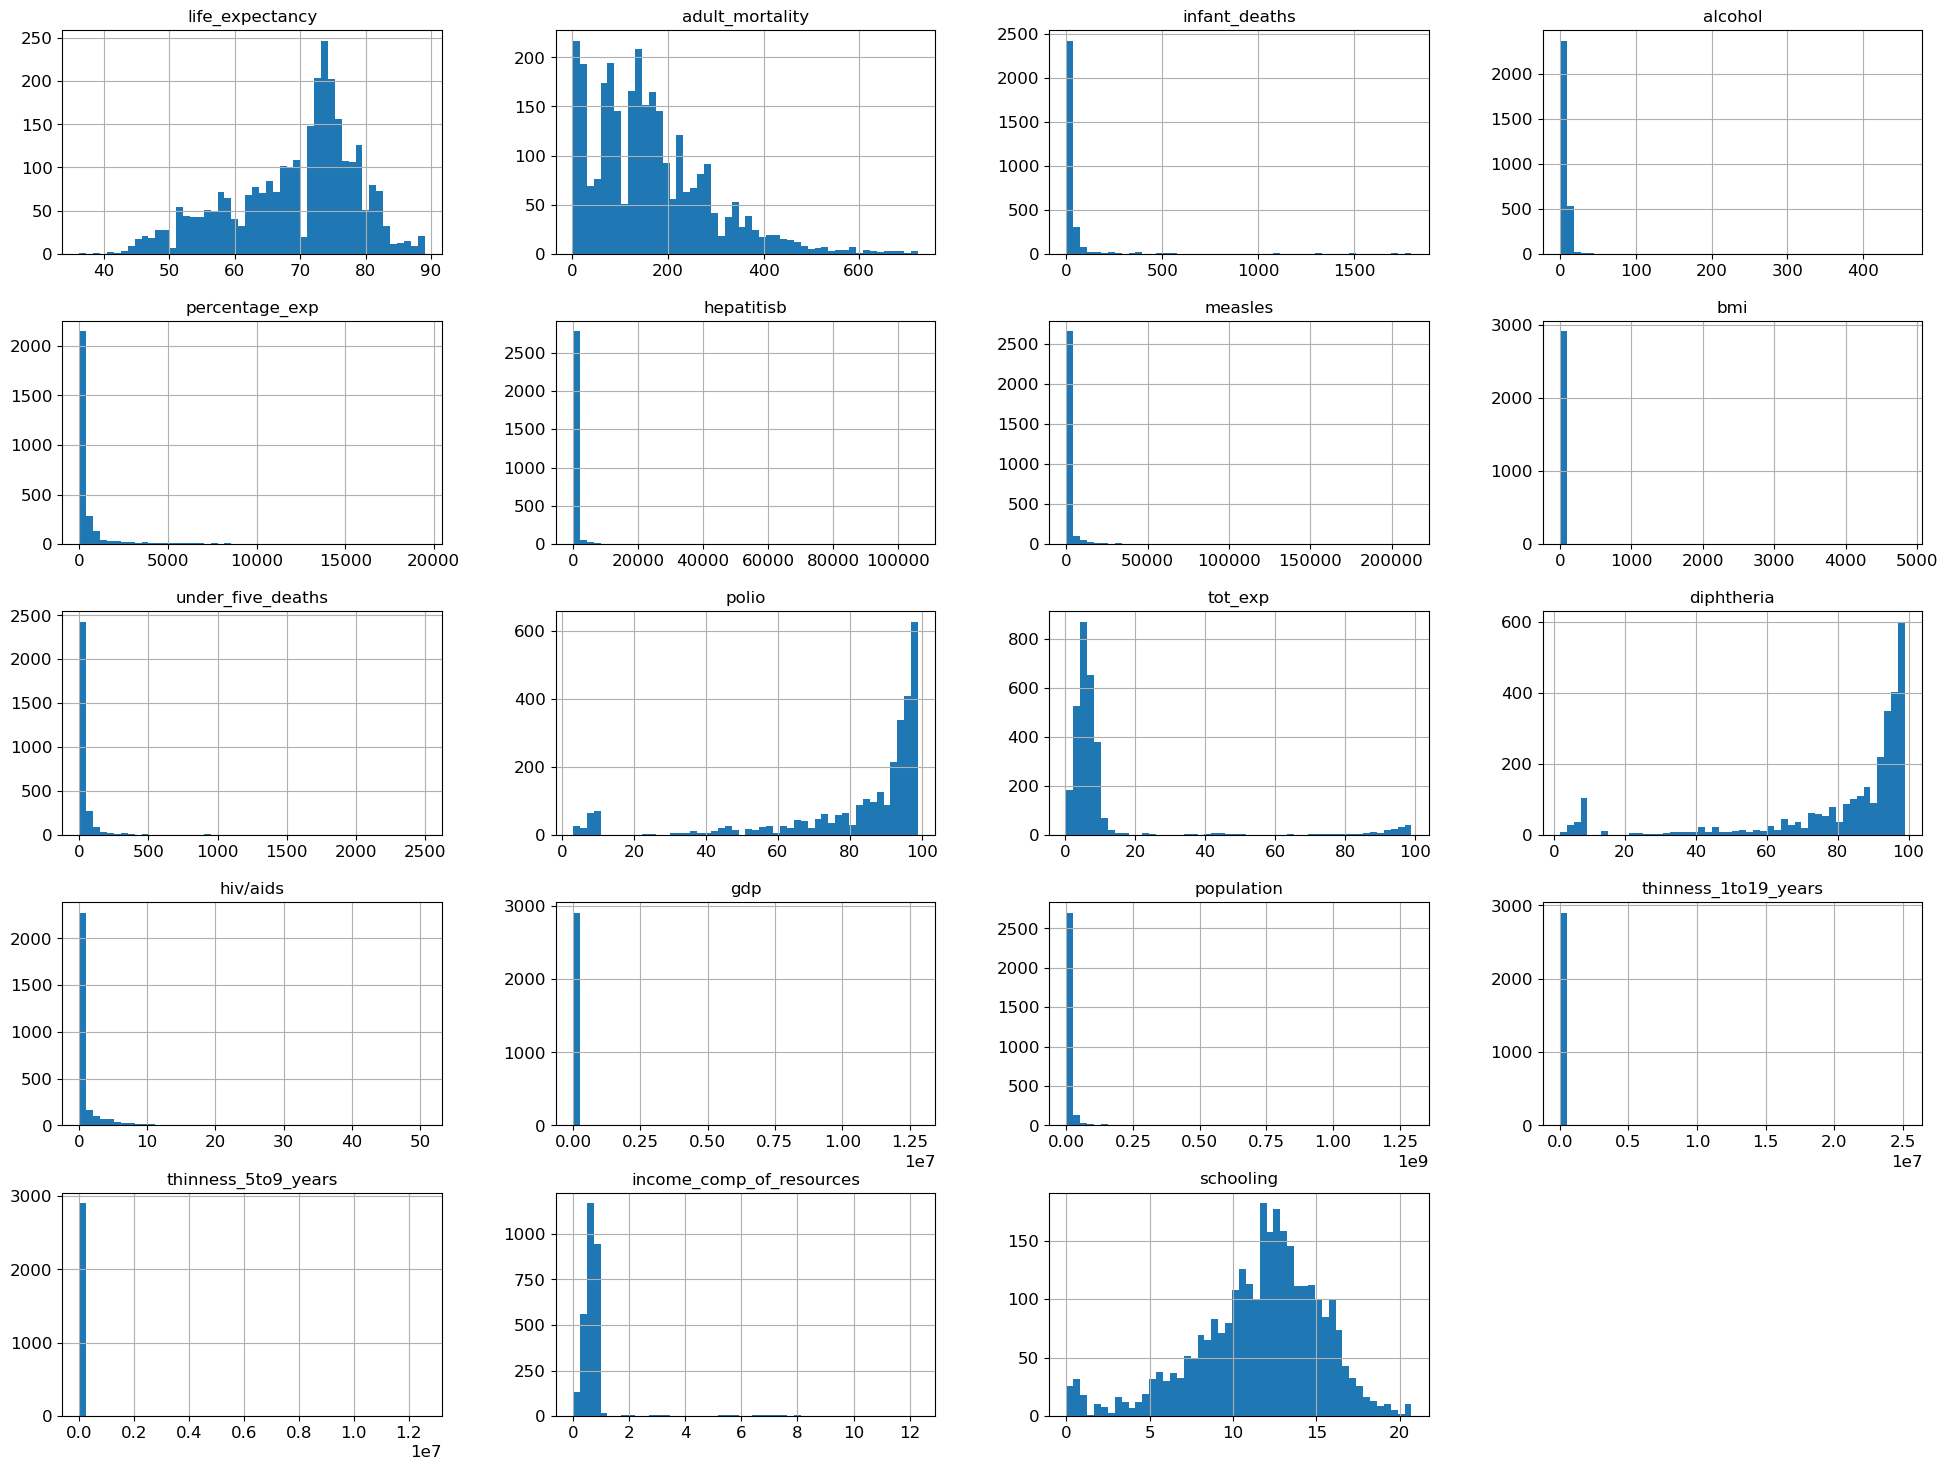

In [24]:
# Showing the histogram of numerical variables
df.drop(columns=["year"]).hist(bins=50, figsize=(24, 18))
plt.show()

# Saving figure
# save_fig("attributes_histogram_plots")

<b>Note:</b> Most of the feature distributions are skewed. Due to the statistical irregularity (with many univariate outliers), `StandardScaler` is an appropriate choice for the ML pipeline.

In [25]:
# Showing the descriptive statistics of categorical variables
df[["status", "country"]].describe()

,status,country
count,2928,2928
unique,2,183
top,Developing,Afghanistan
freq,2416,16


<b>Note:</b> The status appears imbalanced, with 82.5% of countries classified as developing. However, according to worlddata.info, 85.22% of countries worldwide are developing, indicating that the status is not biased.
(Source: <a src='https://www.worlddata.info/developing-countries.php'><b>click here.</b>

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. The outlier number on the life expectancy column is low, hence it is considered consistent. However, the data for the disease-related fields have considerably high numbers of outliers. I will further explore the dataset to identify redundant data and address such cases accordingly.<br><br>
            2. Most of the feature distributions are skewed. Due to the statistical irregularity (with many univariate outliers), `StandardScaler` is an appropriate choice for the ML pipeline.<br><br>
            3. The status appears imbalanced, with 82.5% of countries classified as developing. However, according to worlddata.info, 85.22% of countries worldwide are developing, indicating that the status is not biased.
(Source: <a src='https://www.worlddata.info/developing-countries.php'><b>click here.</b></a>)<br>
    </span>  
</div>

<a id="Modeling"></a>
<h2>   
    <font color = blue>
       <span style='font-family:monospace'>
           6. Data Modeling and Analysis
       </span>   
    </font>    
</h2>

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            6.1 Life Expectancy Trend to Year
        </span>   
    </font>    
</h3>

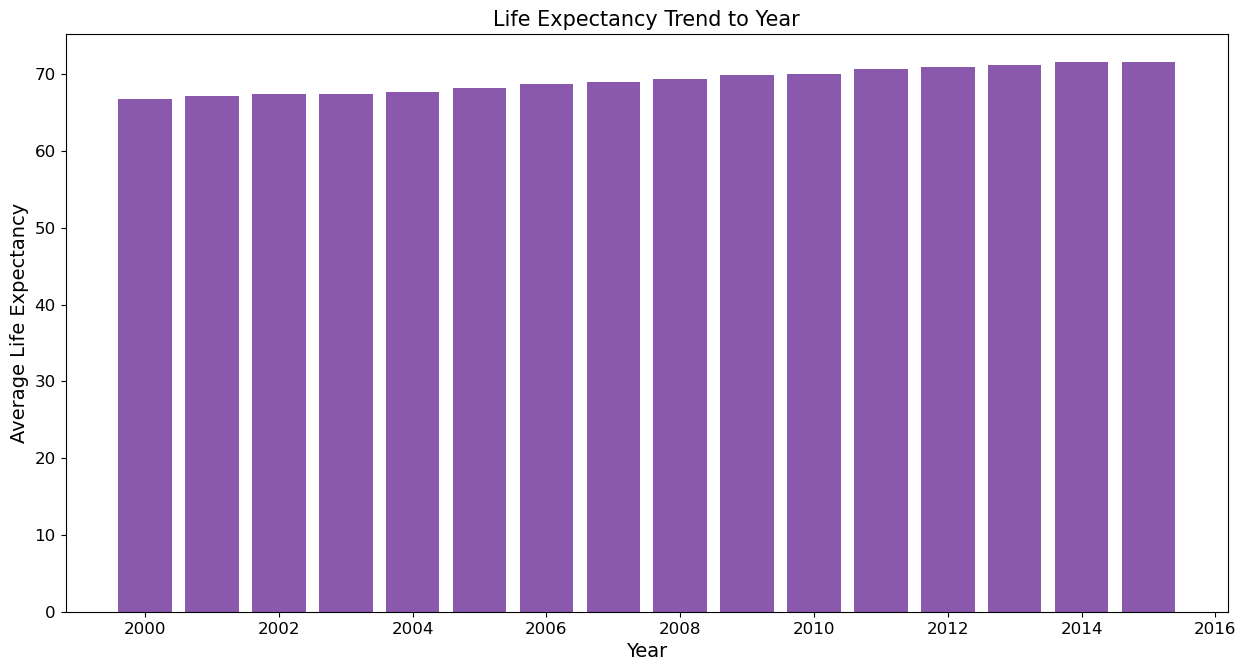

In [26]:
# Showing life expectancy-year graph
plt.figure(figsize=(15,7.5))
plt.bar(df.groupby('year')['year'].count().index, df.groupby('year')['life_expectancy'].mean(),color='indigo',alpha=0.65)
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.title("Life Expectancy Trend to Year", fontsize=15)
plt.show()

# Saving figure
# save_fig("avg_life_expectancy_by_year")

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            The average life expectation of humans tends to increase.<br><br>
    </span>  
</div>

<h3 name='libraries'>   
    <font color = purple >
       <span style='font-family:monospace'>
            6.2 Multivariation Outlier Analysis
        </span>   
    </font>    
</h3>

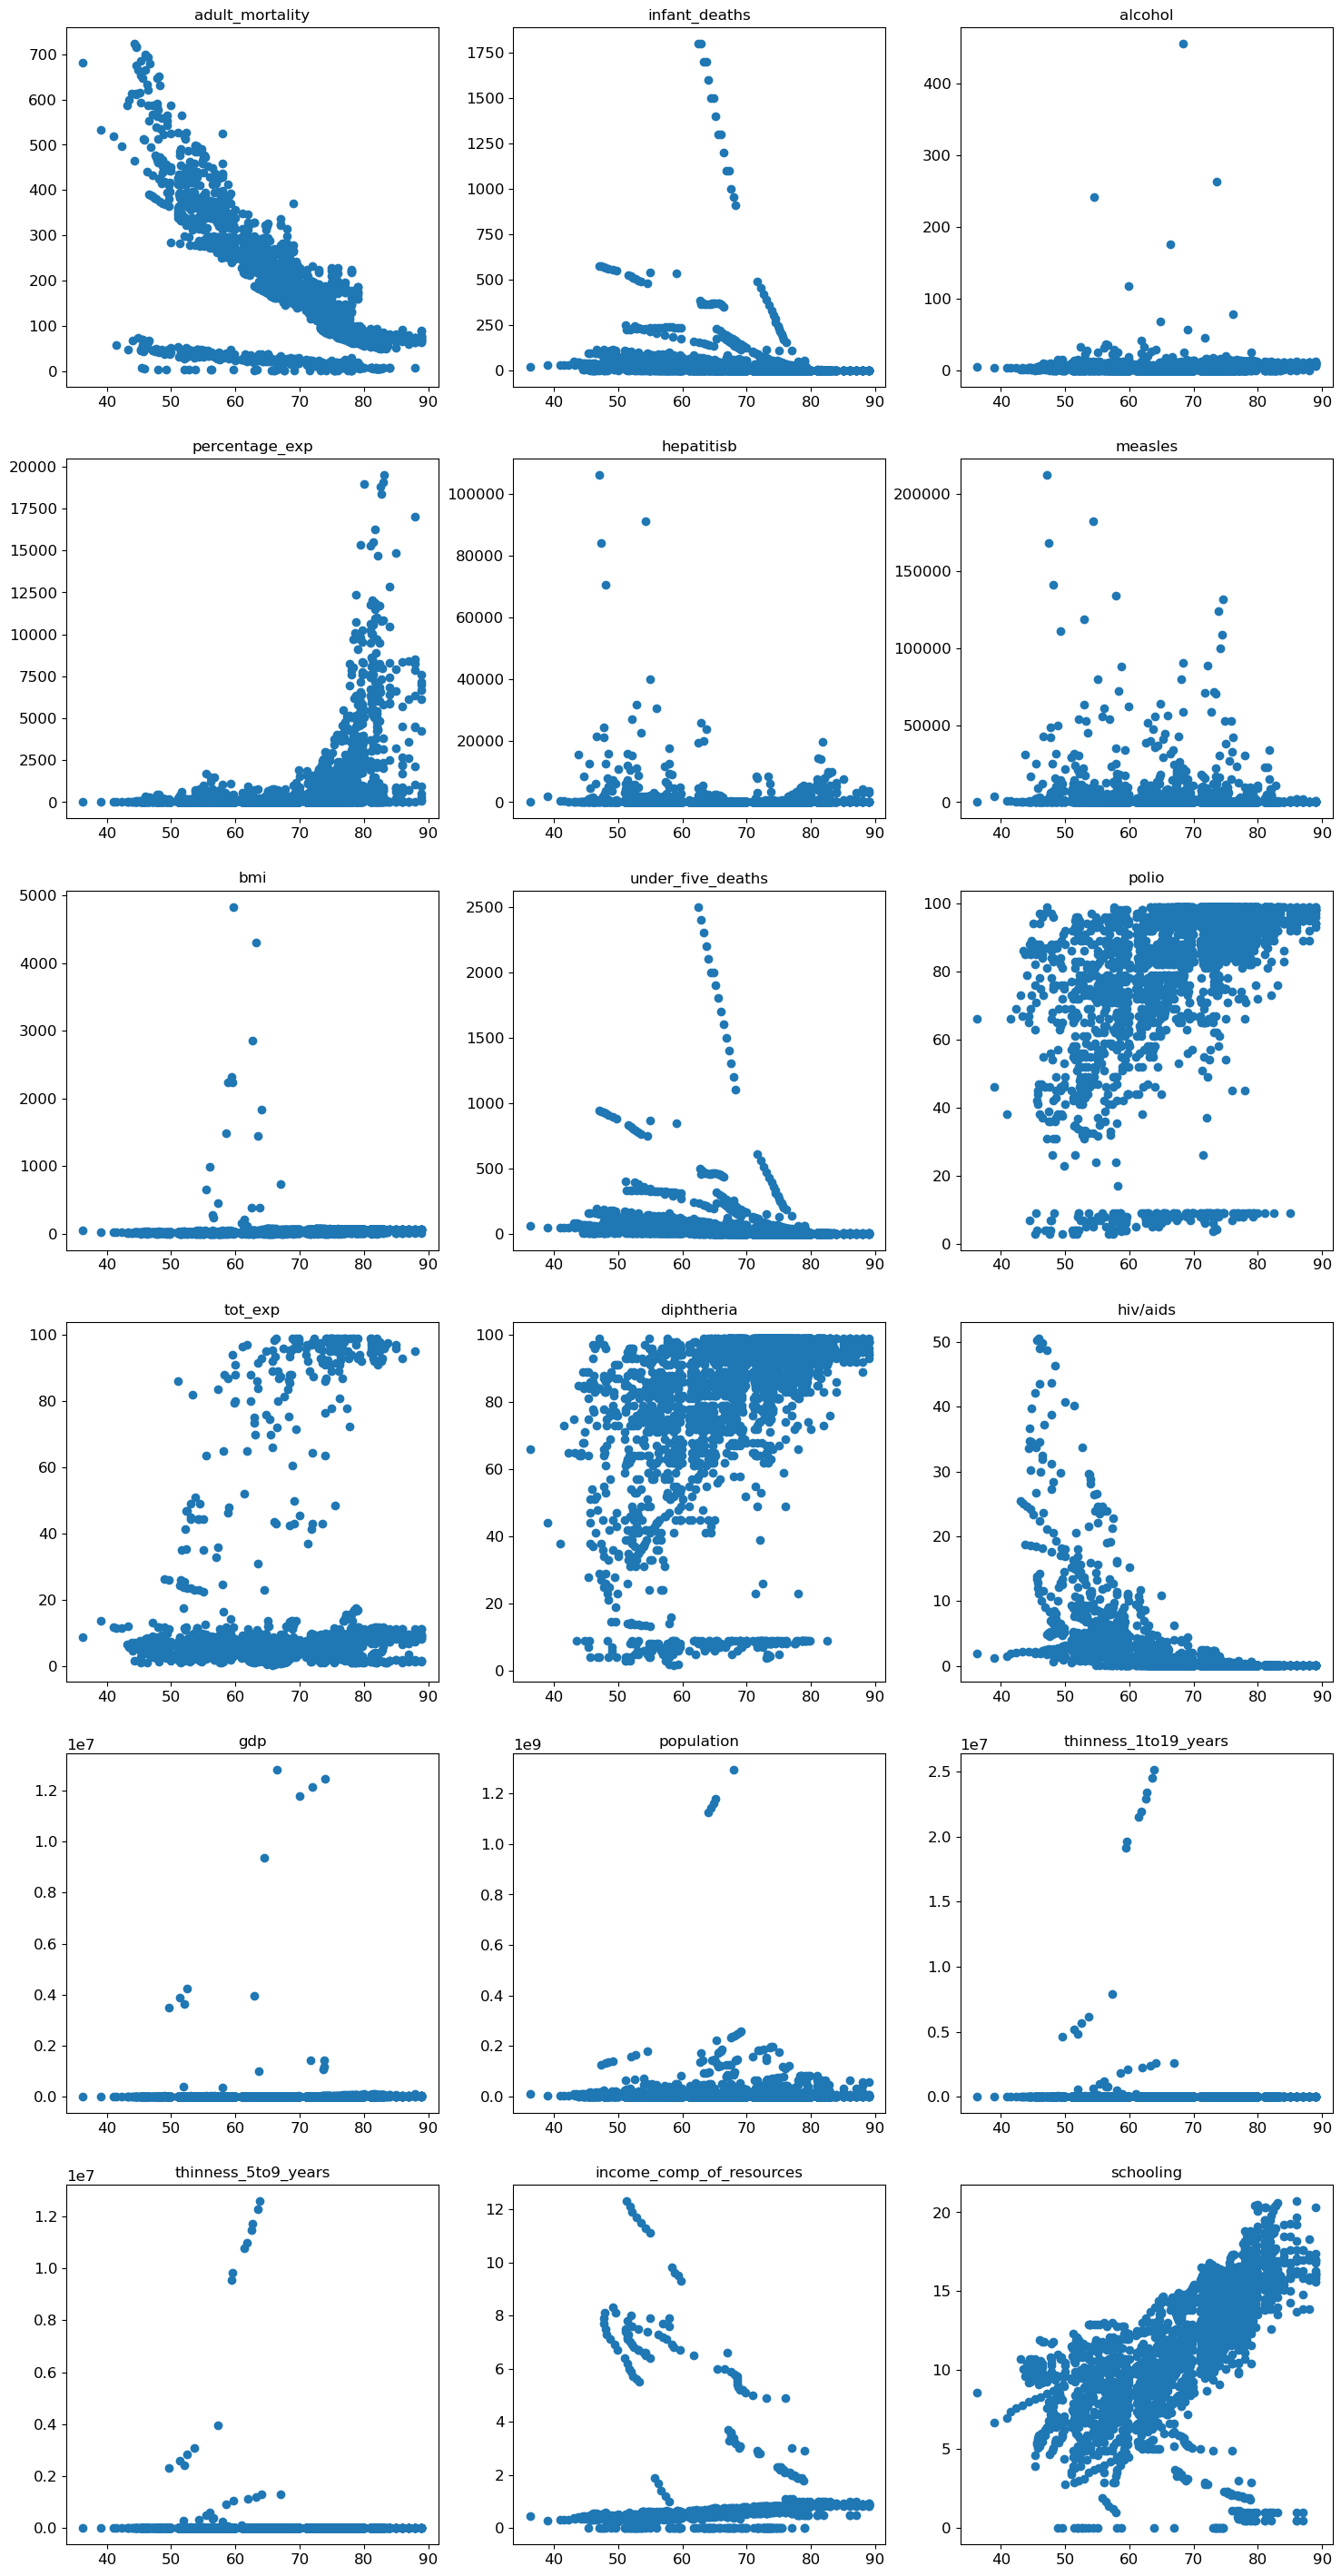

In [27]:
# Showing scatter plot between life_expectancy and all numeric variables
plt.figure(figsize=(18,36))
i = 1
for column in num_df.drop(columns=["life_expectancy"]).columns:
    plt.subplot(6, 3, i)
    plt.scatter(df["life_expectancy"], df[column])
    plt.title(column)
    i += 1
plt.show()

# Saving figure
# save_fig("scatter_matrix_plot_vs_life_expectancy")

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            1. Due to the presence of numerous bivariate outliers, it is challenging to clearly discern the relationship between the target variable and certain attributes (e.g., population, income_comp_of_resources, etc.). However, some linear relationships, such as the connection between adult mortality and schooling, remain relatively easy to identify.<br><br>
            2. Spearman’s correlation is preferred over Pearson’s correlation in this case because:<br>

- The numerical variables appear to be non-Gaussian.
- The relationship between the two numerical variables seems to be non-linear.
- There are numerous outliers in the distribution.<br>
    </span>  
</div>

In [28]:
# Getting diagonal and lower triangular pairs of the correlation matrix

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

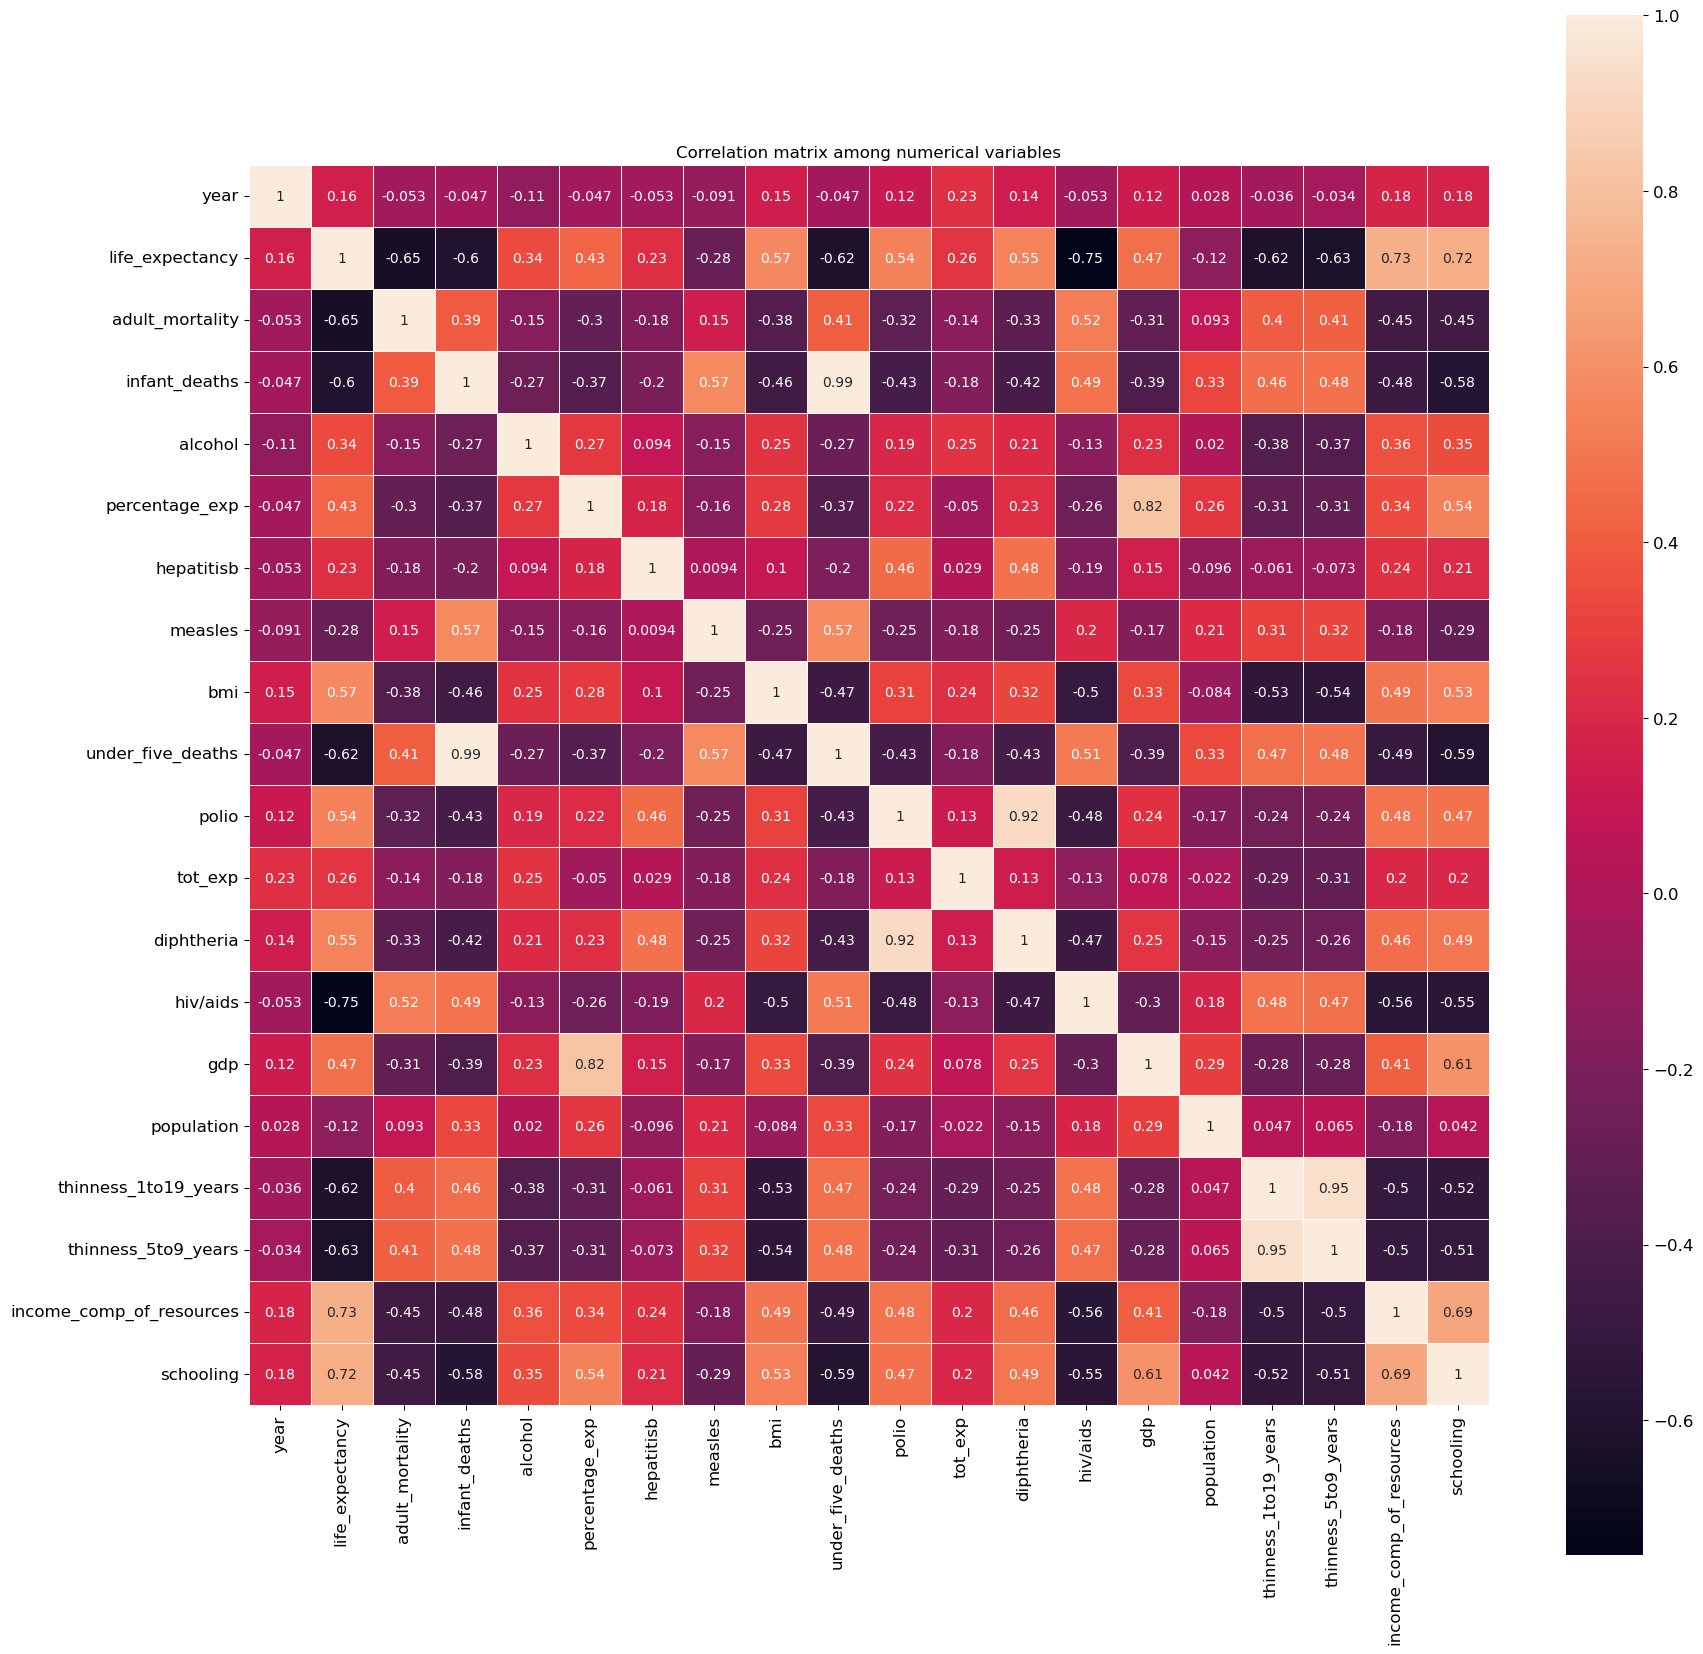

In [29]:
# Checking for the monotonic relationships between variables using Spearman's corr

corr_mat = df.drop(columns=["country", "status"]).corr(method="spearman")

plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5)
plt.title("Correlation matrix among numerical variables")
plt.show()

# Saving figure
# save_fig("heat_map_of_spear_corrmat")

In [30]:
# Acquiring the most correlated pairs of variables
tri_corr_mat = corr_mat.unstack()
cells_to_drop = get_redundant_pairs(df.drop(columns=["country", "status"]))
tri_corr_mat = tri_corr_mat.drop(labels=cells_to_drop).sort_values(ascending=False)

print("Top 10 positive correlated feature pairs:\n" + str(tri_corr_mat[0:10]))
print("\n----------------------------------------------------------------")
print("\nTop 10 negative correlated feature pairs:\n"+ str(tri_corr_mat[-10:]))
print("\n----------------------------------------------------------------")
print("\nTop 10 feature pairs:\n" + str(tri_corr_mat.abs().sort_values(ascending=False)[:10]))

Top 10 positive correlated feature pairs:
infant_deaths             under_five_deaths           0.993221
thinness_1to19_years      thinness_5to9_years         0.948435
polio                     diphtheria                  0.921455
percentage_exp            gdp                         0.821022
life_expectancy           income_comp_of_resources    0.729473
                          schooling                   0.722382
income_comp_of_resources  schooling                   0.691046
gdp                       schooling                   0.606093
measles                   under_five_deaths           0.572276
infant_deaths             measles                     0.571157
dtype: float64

----------------------------------------------------------------

Top 10 negative correlated feature pairs:
hiv/aids           schooling                  -0.554349
                   income_comp_of_resources   -0.559156
infant_deaths      schooling                  -0.578362
under_five_deaths  schooling        

**Note:** Strength of Spearman's correlation - Reference: J. Fowler, L. Cohen and P. Jarvis, 2009, Practical Statistics for Field Biology, p. 132. <br>
<table>
  <tr>
    <th>Coefficient Interval</th>
    <th>Correlation</th>
  </tr>
  <tr>
    <td>0.00 - 0.199</td>
    <td>Very Weak</td>
  </tr>
  <tr>
    <td>0.20 - 0.399</td>
    <td>Weak</td>
  </tr>
  <tr>
    <td>0.40 - 0.599</td>
    <td>Medium</td>
  </tr>
  <tr>
    <td>0.60 - 0.799</td>
    <td>Strong</td>
  </tr>
  <tr>
    <td>0.80 - 1.000</td>
    <td>Very Strong</td>
  </tr>
</table>
<br>
Then features `hiv/aids`, `income_comp_of_resources` and `schooling` could be a good choices for stratified sampling (avoid sampling bias) later.

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            Some sections reveal the colinearity problem of the dataset through Pearson's correlation. Found from a post in Stack Exchange, the need to reduce multicollinearity depends on its **severity** and the primary goal for regression models.<br><br>
    </span>  
- The severity of the problems increases with the degree of the multicollinearity. Having only moderate multicollinearity, we may not need to resolve it.<br>
- Multicollinearity affects only the specific independent variables that are correlated. If multicollinearity is not present for the independent variables that we are particularly interested in, you may not need to resolve it.<br>
- If your primary goal is to make predictions, and you don’t need to understand the role of each independent variable, you don’t need to reduce severe multicollinearity since it affects the coefficients and p-values only.<br><br><br>

<b>Reference:</b><br>
Stack Exchange: https://datascience.stackexchange.com/questions/24452/in-supervised-learning-why-is-it-bad-to-have-correlated-features. <br>
Reference: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis. <br>
Occam's razor: https://en.wikipedia.org/wiki/Occam%27s_razor. <br>
Reference for 3rd point: Applied Linear Statistical Models, p289, 4th Edition.<br><br>
</div>

<h3 name='libraries'>   
    <font color = purple >
        <span style='font-family:monospace'>
            6.3 Life Expectancy to Other Features by Status
        </span>   
    </font>    
</h3>

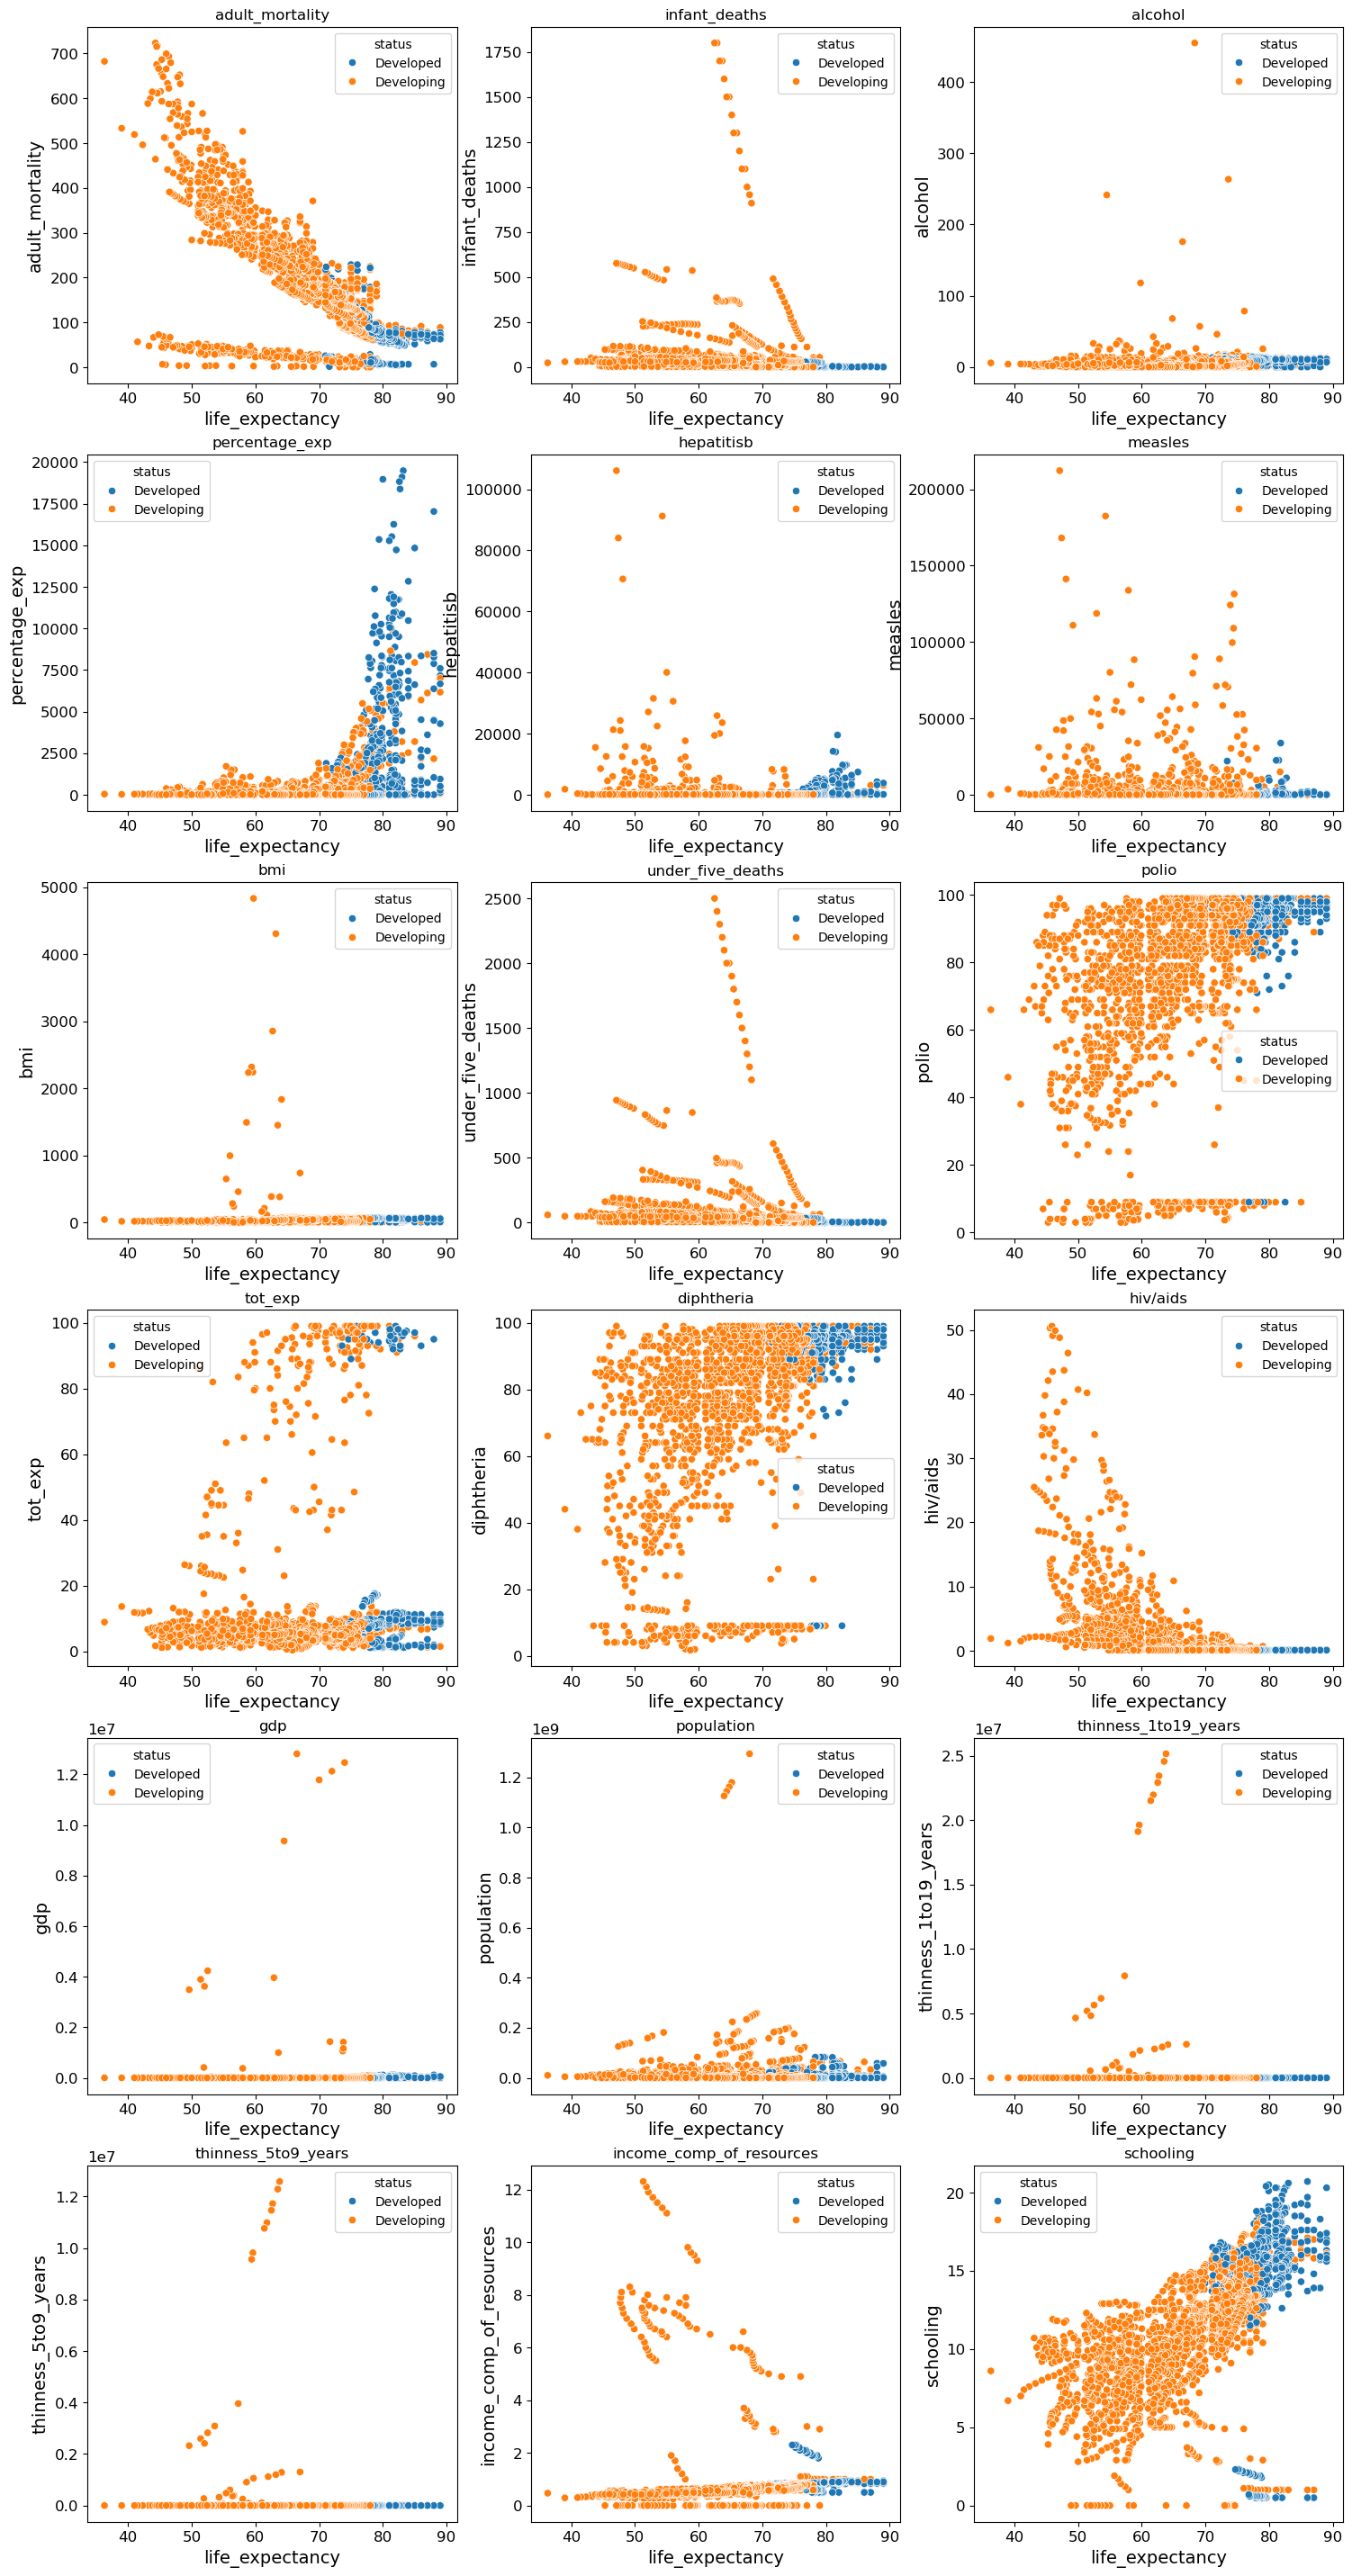

In [37]:
# Visualizing the energy consumption by sources

plt.figure(figsize=(18,36))
i = 1
for column in num_df.drop(columns=["life_expectancy"]).columns:
    plt.subplot(6, 3, i)
    sns.scatterplot(x='life_expectancy', y=column, data=df, hue='status')
    plt.title(column)
    i += 1
plt.show()

# Saving figure
# save_fig("scatter_matrix_plot_vs_life_expectancy_by_status")

<div class="alert alert-block alert-info">
    <span>
        <b><ins>Insights</ins></b><br><br>
            Developed countries stay on the right of most of the plots, meaning they have higher life expectancies than those that are still developing. Developed countries also show higher vaccine coverages that contribute to their high life expectancies. <br><br>
    </span>  
</div>

<a id="Conclusion"></a>
<h2>   
    <font color = blue>
        <span style='font-family:monospace'>
            7. Conclusion
        </span>   
    </font>    
</h2>

<div class="alert alert-block alert-info">
    <span>
        <b><ins></ins></b><br>
        From the plot of the database, developed countries show higher life expectancies. Furthermore, they have lower case numbers of the disease and higher vaccine coverages. This was potentially due to better healthcare, nutrition, and living standards. In contrast, developing countries often face lower life expectancies, influenced by factors like limited access to healthcare, poverty, malnutrition, and higher disease burdens, affecting overall public health outcomes.<br><br>
    </span>  
</div>